# Final project CB-DS-10: Resume classification tool

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#load csv dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [4]:
#Explore the existed categories in the dataset, count the number of resumes available for each category:
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


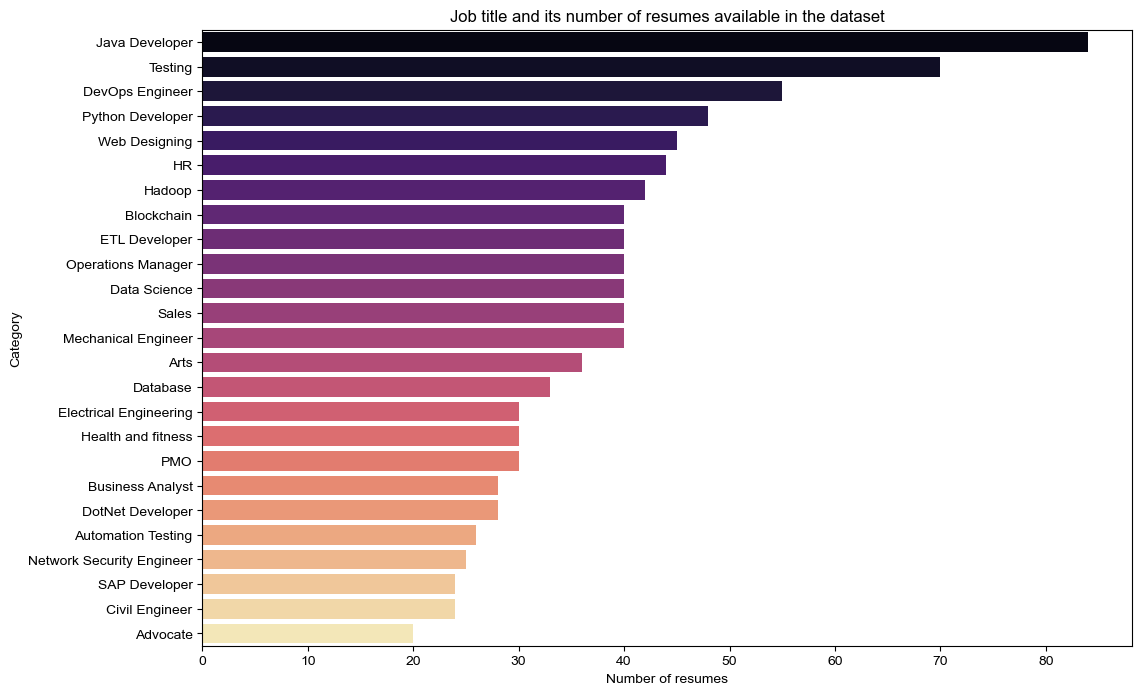

In [5]:
#visualize the data available for each category: 
plt.figure(figsize=(12,8))
graph1 = sns.barplot(x=category['Category'], y=category['index'], palette='magma')
graph1.set(xlabel ="Number of resumes", ylabel = "Category", title ='Job title and its number of resumes available in the dataset')
sns.set_style('darkgrid')
plt.show()


# Data pre-processing and cleaning: 

In [6]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [7]:
df['Cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,Cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [8]:
#getting the entire resume text
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["Cleaned"][i]
corpus

' Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielledong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [11]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words

['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'sql',
 'java',
 'javascript',
 'jquery',
 'machine',
 'learning',
 'regression',
 'svm',
 'na',
 've',
 'bayes',
 'knn',
 'random',
 'forest',
 'decision',
 'trees',
 'boosting',
 'techniques',
 'cluster',
 'analysis',
 'word',
 'embedding',
 'sentiment',
 'analysis',
 'natural',
 'language',
 'processing',
 'dimensionality',
 'reduction',
 'topic',
 'modelling',
 'lda',
 'nmf',
 'pca',
 'neural',
 'nets',
 'database',
 'visualizations',
 'mysql',
 'sqlserver',
 'cassandra',
 'hbase',
 'elasticsearch',
 'd3',
 'js',
 'dc',
 'js',
 'plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'tableau',
 'others',
 'regular',
 'expression',
 'html',
 'css',
 'angular',
 '6',
 'logstash',
 'kafka',
 'python',
 'flask',
 'git',
 'docker',
 'computer',
 'vision',
 'open',
 'cv',
 'and',
 'understanding',
 'of',
 'deep',
 'learning',
 'education',
 'details',
 'data',
 'science',
 'ass

In [12]:
# Now encode the data
label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,Cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


In [92]:
# create a table that have Category Assigned to New_category:
df_labels = df.drop(columns = ['Resume','Cleaned'])
df_labels = df_labels.drop_duplicates().sort_values(by='new_Category', ascending=True).reset_index(drop = True)
print(df_labels)

                     Category  new_Category
0                    Advocate             0
1                        Arts             1
2          Automation Testing             2
3                  Blockchain             3
4            Business Analyst             4
5              Civil Engineer             5
6                Data Science             6
7                    Database             7
8             DevOps Engineer             8
9            DotNet Developer             9
10              ETL Developer            10
11     Electrical Engineering            11
12                         HR            12
13                     Hadoop            13
14         Health and fitness            14
15             Java Developer            15
16        Mechanical Engineer            16
17  Network Security Engineer            17
18         Operations Manager            18
19                        PMO            19
20           Python Developer            20
21              SAP Developer   

In [13]:
df['Cleaned'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

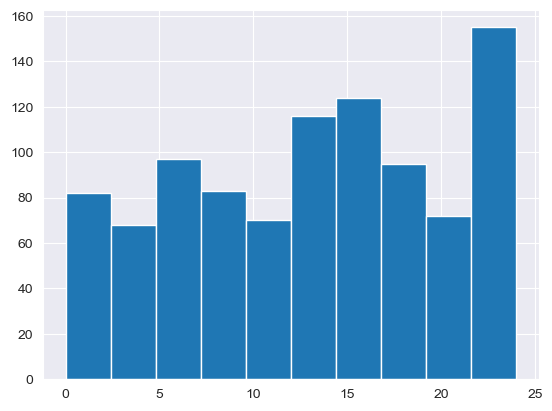

In [14]:
plt.hist(df['new_Category'])

In [15]:
# Vectorizing the cleaned columns
text = df['Cleaned'].values
target = df['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [16]:
WordFeatures.shape

(962, 1500)

# Training model

In [17]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [19]:
# Model Training
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [20]:
# Prediction
y_pred = model.predict(X_test)

In [21]:
print(f' Training Accuracy   : {(model.score(X_train, y_train)*100).round(2)}')
print(f' Validation Accuracy : {(model.score(X_test, y_test)*100).round(2)}')

 Training Accuracy   : 98.96
 Validation Accuracy : 96.89


In [22]:
print(metrics.classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

# Deployment

In [23]:
# Saving our model 
file_name = 'resume_model'

with open(file_name, 'wb') as file:
    pickle.dump(model,file)

In [44]:
model.predict(X_test)

array([22, 10, 16,  1,  6, 15, 10,  9,  6,  1, 11,  1, 22, 23, 24, 12, 21,
       23, 24, 10, 24, 22, 22,  5, 10, 18,  2, 23, 20, 17,  0, 20, 13, 22,
       15, 11, 23, 14, 20, 20,  4,  3, 15, 18, 23,  4,  1, 15, 23, 18, 15,
        9, 21, 14, 11, 16, 20, 19, 18, 11,  5,  8, 19,  1, 10, 16, 11, 21,
        5, 16, 23,  1,  1, 15, 24,  4, 17,  7, 20,  3, 21, 23, 10, 23, 15,
       10, 23,  7,  8, 23,  8, 14, 14,  6, 18, 17, 23, 10, 13, 15, 22, 15,
       18, 20,  3,  9, 12,  8, 16, 11,  8, 24, 18, 21, 11, 15,  9, 15, 13,
       16, 12,  8, 15,  8, 24, 13, 14, 12,  7, 19, 14, 12, 16,  9, 19, 10,
       11,  3,  8, 15, 22, 19, 15, 23,  3, 17,  2,  2, 14, 19,  8, 20, 11,
       12,  7, 19, 22, 13, 24,  3, 24,  9, 14,  3, 10,  1, 19, 22, 13, 15,
       17,  0, 18, 15,  6, 21, 24, 20, 17,  8,  3, 11,  4,  2,  7, 20,  7,
        3, 20,  0,  1, 21, 24])

# Validation:

## Another approach: Train model by using SVC

In [45]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
clf = svm.SVC(kernel='linear', C=1, gamma=1)
clf.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [47]:
y_pred = clf.predict(X_test)

In [48]:
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score)

Accuracy:  0.9896373056994818


In [49]:
print(f' Training Accuracy   : {(clf.score(X_train, y_train)*100).round(2)}')
print(f' Validation Accuracy : {(clf.score(X_test, y_test)*100).round(2)}')

 Training Accuracy   : 100.0
 Validation Accuracy : 98.96


In [52]:
from sklearn.metrics import f1_score

#Evaluate f1-score:
y_pred = clf.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print("F1-score: ", f1)

F1-score:  0.9891767415083477


F1-score is a measure of the harmonic mean of precision and recall. It ranges from 0 to 1, with 1 being the best possible score. A higher F1-score indicates a better balance between precision and recall, and thus a better performing model.

Both KNN and SVC have high F1-scores, which indicates that they are effective at correctly identifying both the positive and negative classes.

KNN has a slightly higher training accuracy than SVC, but SVC has a slightly higher validation accuracy than KNN. This suggests that KNN might be overfitting to the training data, while SVC is able to generalize better to unseen data.

While the difference in F1-score and accuracy between the two methods is relatively small, it is still notable that SVC performs slightly better than KNN on both metrics.

Therefore, based on these metrics, it seems that SVC might be a better choice for this problem. However, it is important to note that the performance of a model can be affected by various factors such as the size and quality of the dataset, the specific hyperparameters chosen for each algorithm, and the specific problem being addressed. Therefore, it is recommended to perform additional analysis and experimentation to make a more informed decision.

## Validation Curve: 

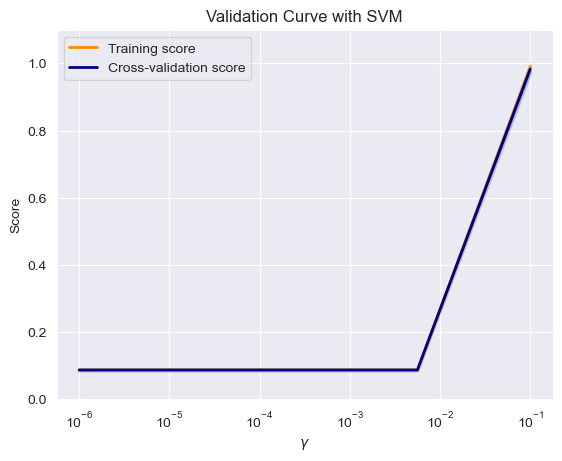

In [61]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    WordFeatures,
    target,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

This plot shows the validation curve for a Support Vector Machine (SVM) model with different values of the gamma parameter. The gamma parameter controls the kernel coefficient for the "rbf" (radial basis function) kernel used in the SVM model.

The plot displays two curves, one for the training score and the other for the cross-validation score. The training score shows how well the SVM model fits the training data, while the cross-validation score indicates how well the model generalizes to new data.

The x-axis represents the gamma parameter values, with values ranging from 10^-6 to 10^-1. The y-axis represents the score, which is the accuracy of the SVM model. The plot also includes shaded areas around the curves, representing the standard deviation of the scores.

The curve for the training score shows that as the gamma parameter increases, the accuracy of the model on the training data increases. The validation curve fits perfectly with the training curve, it could indicate that the model is neither overfitting nor underfitting. This means that the model has learned to generalize well on both the training and validation sets, indicating that the model is a good fit for the data.

In [80]:
labels = pd.Series(df['Category'])
print(labels)

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object


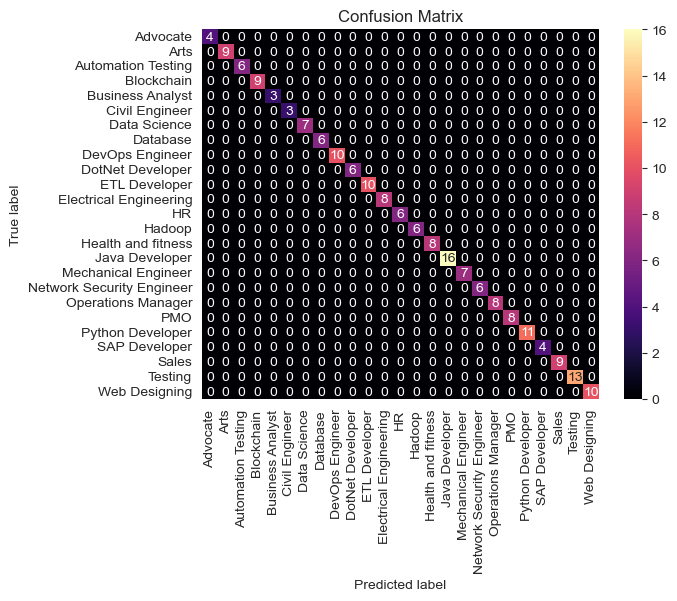

In [93]:
 #Visualize the confusion matrix
cm = confusion_matrix(y_test, y_test)
sns.heatmap(cm, annot=True, cmap='magma')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(np.arange(25)+0.5, labels=df_labels['Category'], rotation=90)
plt.yticks(np.arange(25)+0.5, labels=df_labels['Category'], rotation=0);